In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from scipy import sparse
import random
from tqdm import tqdm
import collections
%matplotlib inline

In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [4]:
import logging

os.remove('./debug.log')
logger = logging.getLogger('debug')
hdlr = logging.FileHandler('./debug.log', mode='w')
formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
hdlr.setFormatter(formatter)
logger.addHandler(hdlr) 
logger.setLevel(logging.INFO)

# Create metapath

In [5]:
import m2v
%load_ext autoreload
%autoreload 2

In [28]:
%%time
# test one iteration of metapath2vec
# os.remove('./debug.log')
logger = logging.getLogger('debug')
hdlr = logging.FileHandler('./debug.log', mode='w')
formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
hdlr.setFormatter(formatter)
logger.addHandler(hdlr) 
logger.setLevel(logging.INFO)

for i in range(10):
    metapaths = list('ABA')
    print(model.metapath2vec(metapaths, 0))
# print(path)

['app_0', 'api_152532', 'api_110744', 'app_881']
['app_0', 'api_110638', 'api_123212', 'app_1062']
['app_0', 'api_4047', 'api_4046', 'app_1282']
['app_0', 'api_236635', 'api_7202', 'app_969']
['app_0', 'api_352437', 'api_352437', 'app_1282']
['app_0', 'api_152496', 'api_379490', 'app_486']
['app_0', 'api_150133', 'api_150133', 'app_474']
['app_0', 'api_459', 'api_14242', 'app_897']
['app_0', 'api_93111', 'api_93111', 'app_1185']
['app_0', 'api_837', 'api_60755', 'app_826']
CPU times: user 31.9 ms, sys: 5.95 ms, total: 37.9 ms
Wall time: 506 ms


# Create Corpus

In [29]:
isinstance(model.metapath2vec(metapaths, 65), collections.Iterable)

True

In [7]:
path = '/datasets/dsc180a-wi20-public/Malware/group_data/group_01/pipeline_output'
A = sparse.load_npz(os.path.join(path, 'A_tr.npz'))
B_tr = sparse.load_npz(os.path.join(path, 'B_tr.npz')).tocsr()
P_tr = sparse.load_npz(os.path.join(path, 'P_tr.npz')).tocsr()

model = m2v.Metapath2Vec(A, B_tr, P_tr)

In [9]:
metas = ('AA','ABA', 'APA', 'ABPBA','APBPA','ABPBPBBPA','ABABBABBBABBBBABBBBBA')
for meta in metas:
    print(meta)
    model.create_corpus(meta)

AA
ABA
APA
ABPBA
APBPA
ABPBPBBPA
ABABBABBBABBBBABBBBBA
CPU times: user 2h 49min 28s, sys: 4min 44s, total: 2h 54min 13s
Wall time: 2h 54min 44s


In [12]:
%%time
path = '/datasets/dsc180a-wi20-public/Malware/group_data/group_01/pipeline_output'
A = sparse.load_npz(os.path.join(path, 'A_tst.npz'))
B_tr = sparse.load_npz(os.path.join(path, 'B_tr.npz')).tocsr()
P_tr = sparse.load_npz(os.path.join(path, 'P_tr.npz')).tocsr()

model = m2v.Metapath2Vec(A, B_tr, P_tr)

metas = ('AA','ABA', 'APA', 'ABPBA','APBPA','ABPBPBBPA','ABABBABBBABBBBABBBBBA')
for meta in metas:
    print(meta)
    model.create_corpus(meta, '_tst')

AA
ABA
APA
ABPBA
APBPA
ABPBPBBPA
ABABBABBBABBBBABBBBBA
CPU times: user 3h 19min 31s, sys: 3min 48s, total: 3h 23min 19s
Wall time: 3h 24min 59s


In [10]:
%%time
path = '/datasets/dsc180a-wi20-public/Malware/group_data/group_01/pipeline_output'
A = sparse.load_npz(os.path.join(path, 'A_reduced_tr.npz'))
B_tr = sparse.load_npz(os.path.join(path, 'B_reduced_tr.npz')).tocsr()
P_tr = sparse.load_npz(os.path.join(path, 'P_reduced_tr.npz')).tocsr()

model = m2v.Metapath2Vec(A, B_tr, P_tr)

# metas = ('AA','ABA', 'APA', 'ABPBA','APBPA','ABPBPBBPA','ABABBABBBABBBBABBBBBA')
metas = ['ABABBABBBABBBBABBBBBA']

for meta in metas:
    print(meta)
    model.create_corpus(meta, '_reduced')

ABABBABBBABBBBABBBBBA
CPU times: user 2h 2min 43s, sys: 1min 30s, total: 2h 4min 13s
Wall time: 2h 4min 42s


In [12]:
%%time
path = '/datasets/dsc180a-wi20-public/Malware/group_data/group_01/pipeline_output'
A = sparse.load_npz(os.path.join(path, 'A_reduced_tst.npz'))
B_tr = sparse.load_npz(os.path.join(path, 'B_reduced_tr.npz')).tocsr()
P_tr = sparse.load_npz(os.path.join(path, 'P_reduced_tr.npz')).tocsr()

model = m2v.Metapath2Vec(A, B_tr, P_tr)

metas = ['AA','ABA', 'APA', 'ABPBA','APBPA','ABPBPBBPA','ABABBABBBABBBBABBBBBA']
for meta in metas:
    print(meta)
    model.create_corpus(meta, '_reduced_tst')

AA
ABA
APA
ABPBA
APBPA
ABPBPBBPA
ABABBABBBABBBBABBBBBA
CPU times: user 3h 26min 44s, sys: 3min 19s, total: 3h 30min 3s
Wall time: 3h 30min 29s


In [19]:
# model.create_corpus('ABABBABBBABBBBABBBBBA')

In [20]:
# %%time
# path = '/datasets/dsc180a-wi20-public/Malware/group_data/group_01/pipeline_output'
# A = sparse.load_npz(os.path.join(path, 'A_reduced_tst.npz'))
# B_tr = sparse.load_npz(os.path.join(path, 'B_reduced_tr.npz')).tocsr()
# P_tr = sparse.load_npz(os.path.join(path, 'P_reduced_tr.npz')).tocsr()
# A_csr = A
# A_csc = A.tocsc(copy=True)

# model.create_corpus('ABABBABBBABBBBABBBBBA', '_tst')

# Train word embeddings

In [21]:
def check_tst_file(CORPUS_TEST):
    # check if the app number in the test corpus starts from 1335
    f = open(CORPUS_TEST).readlines()
    app_num = int(f[0].split()[0].split('_')[1])
    if(app_num <A.shape[0]):
        print('changing')
        walks = []
        for line in f:
            walk = line.strip().split(' ')
            walks.append([
                f"app_{int(node.split('_')[-1]) + 1335}"
                if node.startswith('app') else node
                for node in walk
            ])


        f = open(CORPUS_TEST, "w")
        for walk in walks:
            f.write(' '.join(walk) + '\n')
        f.close()
    else:
        print('changed')
        return

In [69]:
def prediction(metapath):
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.pipeline import Pipeline
    fp = '/datasets/dsc180a-wi20-public/Malware/group_data/group_01/metapath_corpus'
    CORPUS = os.path.join(fp, 'meta_%s.cor'%metapath)
    CORPUS_TEST = os.path.join(fp, 'meta_%s_tst.cor'%metapath)
#     print(CORPUS, CORPUS_TEST)
    check_tst_file(CORPUS_TEST)
    
    
    from gensim import utils
    import gensim.models

    class MyCorpus(object):
        """An interator that yields sentences (lists of str)."""
        def __init__(self, CORPUS, CORPUS_TEST):
            self.lines = open(CORPUS).readlines()
    #         print(len(self.lines))
            self.lines += open(CORPUS_TEST).readlines()  # !!! Test
    #         print(len(self.lines))

        def __iter__(self):
            corpus_path = CORPUS
            for line in tqdm(self.lines):
                # assume there's one document per line, tokens separated by whitespace
                yield line.strip().split(' ')
    print('Creating model...')
    sentences = MyCorpus(CORPUS, CORPUS_TEST)
    model = gensim.models.Word2Vec(sentences=sentences, min_count=10, size=500, window=10)
    
    meta_tr = pd.read_csv(os.path.join(path, 'meta_tr.csv'), index_col=0)
    meta_tst = pd.read_csv(os.path.join(path, 'meta_tst.csv'), index_col=0)

    y_train = meta_tr.label == 'class1'
    y_test = meta_tst.label == 'class1'

    app_vec = np.array([model.wv[f'app_{i}'] for i in range(len(meta_tr))])
    app_vec_tst = np.array([model.wv[f'app_{i}'] for i in range(len(meta_tr), len(meta_tr) + len(meta_tst))])
    
    # select best parameters
#     print('Selecting best parameters...')
#     param_grid = {'C': [1,10,100,1000,10000], 'kernel': ('linear', 'poly'), 'degree': np.arange(20)+1}
#     svc = SVC(gamma='auto')
#     clf = GridSearchCV(svc, param_grid, cv=5, return_train_score=True, iid=False, n_jobs=-1)
#     best = clf.fit(app_vec, y_train).best_params_
    
    print('Training...')
#     svm = SVC(kernel='poly', C=best['C'], degree=best['degree'], gamma='auto')
    svm = SVC(kernel='linear')
    svm.fit(app_vec, y_train)
    
    y_pred = svm.predict(app_vec_tst)
    print('train_acc: ', svm.score(app_vec, y_train), '\n')
    print('test_acc: ', svm.score(app_vec_tst, y_test), '\n')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('tn', 'fp', 'fn', 'tp', '\n')
    print(tn, fp, fn, tp)
    
    return model, y_train, y_test, app_vec, app_vec_tst, y_pred
    

In [70]:
%%time
model, y_train, y_test, app_vec, app_vec_tst, y_pred = prediction('ABABBABBBABBBBABBBBBA')

changed
Creating model...


100%|██████████| 2670000/2670000 [01:18<00:00, 34188.33it/s]


Training...
train_acc:  1.0 

test_acc:  0.49063670411985016 

tn fp fn tp 

260 411 269 395
CPU times: user 20min 12s, sys: 9.46 s, total: 20min 21s
Wall time: 6min 48s


In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(app_vec, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [35]:
clf.score(app_vec, y_train)

1.0

In [36]:
clf.score(app_vec_tst, y_test)

0.48389513108614235

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(app_vec, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [45]:
neigh.score(app_vec, y_train)

0.8958801498127341

In [46]:
neigh.score(app_vec_tst, y_test)

0.4853932584269663

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(app_vec, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
clf.score(app_vec, y_train)

1.0

In [49]:
clf.score(app_vec_tst, y_test)

0.49138576779026216

In [52]:
clf.predict(app_vec_tst)[:10]

array([ True, False, False,  True, False, False,  True,  True,  True,
       False])

In [54]:
y_test.head(10)

app_1335     True
app_1336    False
app_1337     True
app_1338     True
app_1339    False
app_1340     True
app_1341     True
app_1342    False
app_1343     True
app_1344    False
Name: label, dtype: bool

In [13]:
%%time
metas = ('AA','ABA', 'APA', 'ABPBA','APBPA', 'ABPBPBBPA')
for meta in metas:
    print(meta)
    prediction(meta)

AA
changed
Creating model...


100%|██████████| 2669986/2669986 [00:21<00:00, 126199.10it/s]


Selecting best parameters...
Training...
train_acc:  0.9962546816479401 

test_acc:  0.9228464419475655 

tn fp fn tp 

667 4 99 565
ABA
changed
Creating model...


100%|██████████| 2670000/2670000 [00:22<00:00, 117756.14it/s]


Selecting best parameters...
Training...
train_acc:  0.9962546816479401 

test_acc:  0.9827715355805243 

tn fp fn tp 

661 10 13 651
APA
changed
Creating model...


100%|██████████| 2670000/2670000 [00:23<00:00, 112634.04it/s]


Selecting best parameters...
Training...
train_acc:  0.9737827715355806 

test_acc:  0.8741573033707866 

tn fp fn tp 

655 16 152 512
ABPBA
changed
Creating model...


100%|██████████| 2670000/2670000 [00:29<00:00, 91188.64it/s] 


Selecting best parameters...
Training...
train_acc:  0.998501872659176 

test_acc:  0.8441947565543071 

tn fp fn tp 

663 8 200 464
APBPA
changed
Creating model...


100%|██████████| 2670000/2670000 [00:29<00:00, 90327.17it/s] 


Selecting best parameters...
Training...
train_acc:  0.9865168539325843 

test_acc:  0.49737827715355803 

tn fp fn tp 

0 671 0 664
ABPBPBBPA
changed
Creating model...


100%|██████████| 2670000/2670000 [00:36<00:00, 72374.64it/s] 


Selecting best parameters...
Training...
train_acc:  0.998501872659176 

test_acc:  0.5348314606741573 

tn fp fn tp 

283 388 233 431
CPU times: user 30min 25s, sys: 36 s, total: 31min 1s
Wall time: 18min 1s


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [ ]:
%%time
param_grid = {'C': [1,10,100,1000,10000], 'kernel': ('linear', 'poly'), 'degree': np.arange(20)+1}
svc = SVC(gamma='auto')
clf = GridSearchCV(svc, param_grid, cv=5, return_train_score=True, iid=False, n_jobs=-1)
best = clf.fit(app_vec, y_train).best_params_
best

In [ ]:
best['C']

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    embs = {}

    for word in model.wv.vocab:
        if 'api' in word: continue
        embs[word] = model.wv[word]
    
    tsne_model = TSNE(n_components=2, random_state=0)
    new_values = tsne_model.fit_transform(list(embs.values()))

    token_coor = dict(zip(embs.keys(), new_values))

    plt.figure(figsize=(16, 12))
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for token, coor in token_coor.items():
        x, y = coor
        label = meta_tr[meta_tr.app_id == token].label.item()
        color = cycle[0] if label == 'class1' else cycle[1]
        plt.scatter(x, y, c=color, alpha=0.8)
# #         plt.annotate(labels[i],
# #                      xy=(x[i], y[i]),
# #                      xytext=(5, 2),
# #                      textcoords='offset points',
# #                      ha='right',
# #                      va='bottom')
    plt.show()

In [28]:
meta_tr = pd.read_csv(os.path.join(path, 'meta_tr.csv'), index_col=0)
meta_tr['app_id'] = [f'app_{i}' for i in range(meta_tr.shape[0])]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: `item` has been deprecated and will be removed in a future version


ValueError: can only convert an array of size 1 to a Python scalar

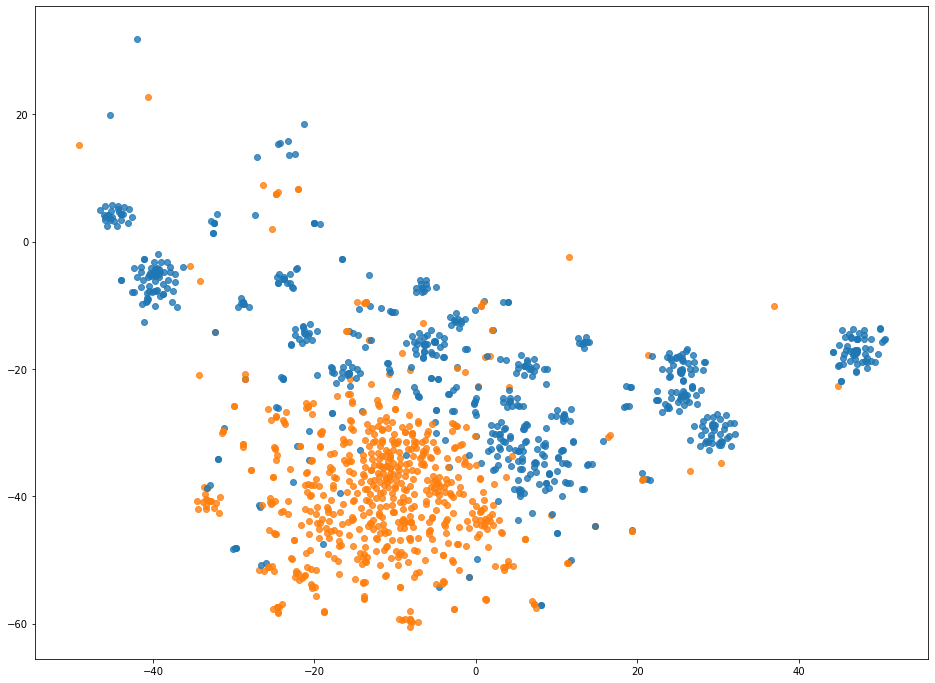

In [30]:
%%time
tsne_plot(model)

In [ ]:
path = '/datasets/dsc180a-wi20-public/Malware/group_data/group_01/pipeline_output'
label = pd.read_csv(os.path.join(path, 'meta_tr.csv'))

In [ ]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = []  # positions in vector space
    labels = []  # keep track of words to label our data again later
    for word in model.wv.vocab:
        if 'app' in word:
            if (label.iloc[int(word.split('_')[1]), 1] == 'class1'):
                labels.append(1)
            else:
                labels.append(0)

            vectors.append(model.wv[word])
            # labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


def plot_with_plotly(x_vals, y_vals, labels, metapath, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='markers',
                       text=labels, marker=dict(size=5, color=labels)))
    
    fig.update_layout(
        title = "Scatter graph of metapath: " + metapath,
#         xaxis_title="x Axis Title",
#         yaxis_title="y Axis Title",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="#7f7f7f"
        )
    )
    
    fig.show()
    
#     data = [trace]

#     if plot_in_notebook:
#         init_notebook_mode(connected=True)
#         iplot(data, filename='word-embedding-plot')
#     else:
#         plot(data, filename='word-embedding-plot.html')


In [ ]:
x_vals, y_vals, labels = reduce_dimensions(model)
plot_with_plotly(x_vals, y_vals, labels, 'AA')

# Prediction